In [1]:
import numpy as np
import keras
from keras.layers import Dense, TimeDistributed, Input
from keras.models import Model

D:\sf\conda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
labels = np.random.randint(10, size = (1000, 1))
one_hot_labels = keras.utils.to_categorical(labels, num_classes = 10)
print(one_hot_labels.shape)

(1000, 10)


In [3]:
def get_model(shape):
    inputs = Input(shape = shape)
    X = Dense(64, activation = 'relu')(inputs)
    X = Dense(32, activation = 'relu')(X)
    outputs = Dense(32, activation = 'softmax')(X)
    model = Model(inputs = inputs, outputs = outputs)
    return model

In [4]:
model = get_model((784, ))

In [5]:
inputs = np.random.randint(10, size = (20, 784))
labels = np.random.randint(10, size = (20, 32))
print(inputs.shape)
print(labels.shape)

(20, 784)
(20, 32)


In [6]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [7]:
# training
model.fit(x = inputs, y = labels, batch_size = 1, epochs = 5)

Epoch 1/5
20/20 [==============================] - 0s 20ms/step - loss: 775.4324 - acc: 0.1000
Epoch 2/5
20/20 [==============================] - 0s 3ms/step - loss: 520.4101 - acc: 0.0500
Epoch 3/5
20/20 [==============================] - 0s 2ms/step - loss: 508.9082 - acc: 0.0000e+00
Epoch 4/5
20/20 [==============================] - 0s 2ms/step - loss: 508.5298 - acc: 0.0500
Epoch 5/5
20/20 [==============================] - 0s 3ms/step - loss: 508.5588 - acc: 0.0000e+00


In [8]:
input_sequences = Input(shape = (20, 784))
predict_sequences = TimeDistributed(model)(input_sequences)

In [9]:
print(predict_sequences)

Tensor("time_distributed_1/Reshape_1:0", shape=(?, 20, 32), dtype=float32)


In [10]:
from keras.layers import LSTM
x = Input(shape = (32, 128))
lstm = LSTM(20)
a_lstm = lstm(x)
assert lstm.output == a_lstm
print(lstm.output_shape)
print(a_lstm.get_shape())
print(lstm)
print(a_lstm)

(None, 20)
(?, 20)
Tensor("lstm_1/TensorArrayReadV3:0", shape=(?, 20), dtype=float32)


In [11]:
model_json = model.to_json()

In [12]:
from keras.models import model_from_json
newmodel = model_from_json(model_json)

In [13]:
config = model.get_config()
configmodel = Model.from_config(config)

In [14]:
from keras.models import model_from_yaml
yaml = model.to_yaml()
print(yaml)
yarmmodel = model_from_yaml(yaml)

backend: tensorflow
class_name: Model
config:
  input_layers:
  - [input_1, 0, 0]
  layers:
  - class_name: InputLayer
    config:
      batch_input_shape: !!python/tuple [null, 784]
      dtype: float32
      name: input_1
      sparse: false
    inbound_nodes: []
    name: input_1
  - class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
      bias_regularizer: null
      kernel_constraint: null
      kernel_initializer:
        class_name: VarianceScaling
        config: {distribution: uniform, mode: fan_avg, scale: 1.0, seed: null}
      kernel_regularizer: null
      name: dense_1
      trainable: true
      units: 64
      use_bias: true
    inbound_nodes:
    - - - input_1
        - 0
        - 0
        - {}
    name: dense_1
  - class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      bias_constraint: null
      bia

In [18]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png') 

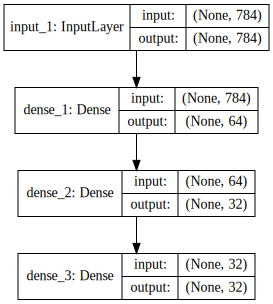

In [20]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
Total params: 53,376
Trainable params: 53,376
Non-trainable params: 0
_________________________________________________________________


In [17]:
keras.utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
Total params: 53,376
Trainable params: 53,376
Non-trainable params: 0
_________________________________________________________________


In [19]:
import pydot
print(pydot.find_graphviz())

AttributeError: module 'pydot' has no attribute 'find_graphviz'